# Intro
My data analysis will explore the question of whether there is a positive correlation between Internet Movie DataBase scores and The Movie DataBase scores as of July 2022

# Import

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import warnings; warnings.filterwarnings("ignore")

In [36]:
data = pd.read_csv("/Users/tgut03/Jupyter/Data/Netflix Titles.csv")
data.drop(data.columns.difference(["title", "imdb_score", "tmdb_score"]), axis = 1, inplace = True)
data.head()

,title,imdb_score,tmdb_score
0,Five Came Back: The Reference Films,NaN,NaN
1,Taxi Driver,8.2,8.179
2,Deliverance,7.7,7.300
3,Monty Python and the Holy Grail,8.2,7.811
4,The Dirty Dozen,7.7,7.600


In [37]:
dataInfo = pd.DataFrame()
dataInfo["Type"] = data.dtypes
dataInfo["Nulls"] = data.isnull().sum()
dataInfo["Uniques"] = data.nunique()
print(dataInfo)
print(data.shape)

               Type  Nulls  Uniques
title        object      1     5798
imdb_score  float64    482       80
tmdb_score  float64    311      394
(5850, 3)


# Process

In [38]:
# Remove Nulls
data.dropna(inplace = True)

In [39]:
# Remove Duplicates
data["title"].drop_duplicates(inplace = True)

# Explore

In [40]:
# Outliers
IQR = data.quantile(0.50, numeric_only = True)
lowerQuantile = data.quantile(0.25, numeric_only = True) - 1.5 * IQR
upperQuantile = data.quantile(0.75, numeric_only = True) + 1.5 * IQR
outliers = (data < lowerQuantile) | (data > upperQuantile)
print(f"outliers = {outliers.sum().sum()}")

outliers = 0


In [41]:
# Score Frequency
IMDB = data["imdb_score"].round().value_counts().rename("IMDB")
TMDB = data["tmdb_score"].round().value_counts().rename("TMDB")
scoreFrequency = pd.concat([IMDB, TMDB], axis = 1)
scoreFrequency

,IMDB,TMDB
7.0,1619.0,1752
6.0,1570.0,1436
8.0,988.0,1193
5.0,580.0,365
4.0,230.0,111
9.0,89.0,176
3.0,48.0,14
2.0,20.0,18
10.0,1.0,73
1.0,NaN,7


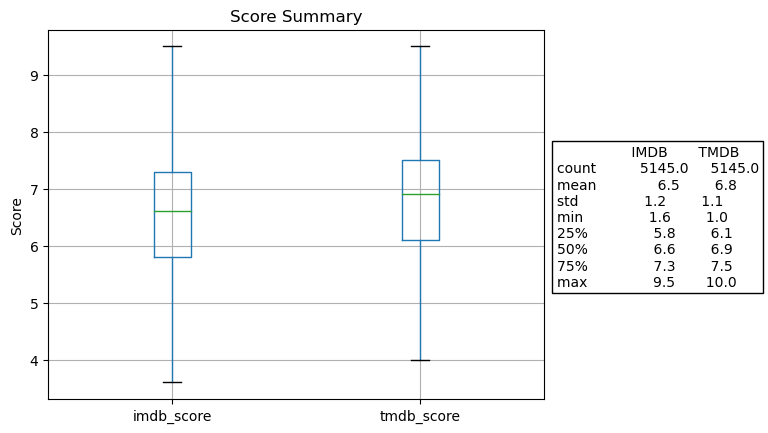

In [42]:
# Score Summary
IMDB = data["imdb_score"].describe().round(1).rename("IMDB")
TMDB = data["tmdb_score"].describe().round(1).rename("TMDB")
scoreSummary = pd.concat([IMDB, TMDB], axis = 1)

# Table
table = scoreSummary.to_string(col_space = 10)
plt.text(2.55, 6.5, table, ha = "left", va = "center", bbox = dict(boxstyle = "square", facecolor = "white"))

# Boxplot
data.boxplot(column = ["imdb_score", "tmdb_score"], showfliers = False) # 0 Outliers
plt.ylabel("Score")
plt.title("Score Summary")
plt.show()

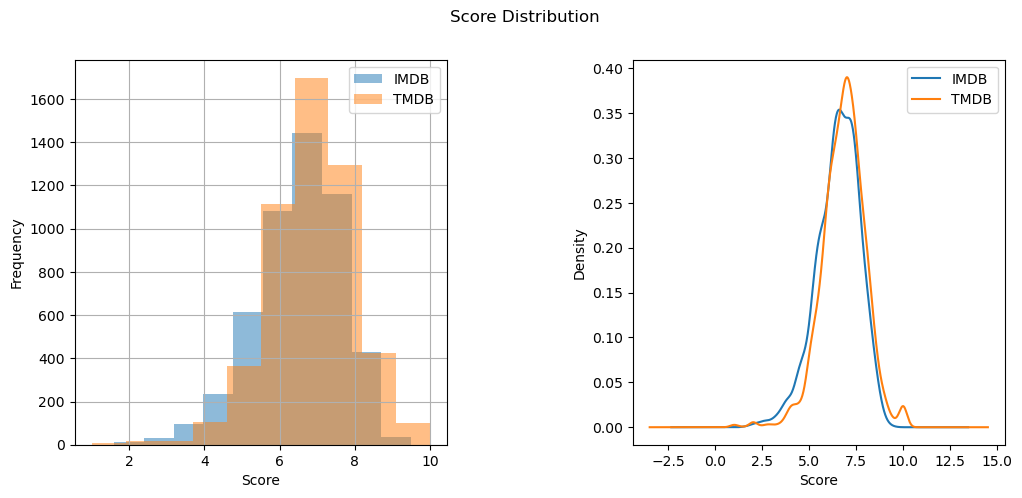

In [43]:
# 1 Figure 2 Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Histogram
data["imdb_score"].hist(alpha = 0.5, label = "IMDB", ax = ax1)
data["tmdb_score"].hist(alpha = 0.5, label = "TMDB", ax = ax1)
ax1.set_xlabel("Score")
ax1.set_ylabel("Frequency")
ax1.legend()

# Kernel Density Estimate
data["imdb_score"].plot.kde(label = "IMDB", ax = ax2)
data["tmdb_score"].plot.kde(label = "TMDB", ax = ax2)
ax2.set_xlabel("Score")
ax2.set_ylabel("Density")
ax2.legend()

plt.subplots_adjust(wspace = 0.5)
fig.suptitle("Score Distribution")
plt.show()

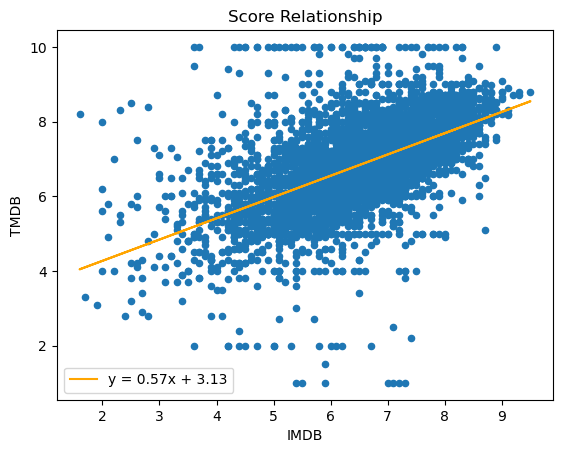

In [44]:
# Scatterplot
data.plot.scatter(x = "imdb_score", y = "tmdb_score")
x = plt.xlabel("IMDB")
y = plt.ylabel("TMDB")

# Calculate Trendline
coefficient = np.polyfit(data["imdb_score"], data["tmdb_score"], 1).round(2)
m = coefficient[0] # Slope
b = coefficient[1] # Intercept
trendlineEq = (f"y = {m}x + {b}") # Equation

# Plot Trendline
plt.plot(data["imdb_score"], m * data["imdb_score"] + b, color = "orange", label = trendlineEq)
title = plt.title("Score Relationship")
legend = plt.legend()
plt.show()

In [45]:
# Correlation
corr, pValue = stats.pearsonr(data["imdb_score"], data["tmdb_score"])
print(f"correlation = {corr.round(2)} and p-value = {pValue}")

correlation = 0.57 and p-value = 0.0


# Conclusion
The correlation coefficient measures the relationship between 2 variables. P-values measure the statistical significance of the correlation coefficient and indicates the probability of correlation as extreme or more extreme if there was no relationship between the 2 variables.

Therefore, we can conclude there is a positive correlation between IMDB scores and TMDB scores because the correlation = 0.57 and the p-value = 0. This relationship can provide value to netflix enthusiasts who seek reliable ratings, or present a business opportunity to merge the 2 associated platforms into 1 integrated user experience.

Reminder - correlation does not imply causation. The next step for this analysis would be to implement additional variables to identify causal factors. 